In [12]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os
import matplotlib.pyplot as plt
from rio_toa.toa_utils import rescale, _parse_bands_from_filename
import numpy as np 

In [13]:
dirpath=r'../mardin/LC08_L1TP_172034_20180704_20180717_01_T1/LC08_L1TP_172034_20180704_20180717_01_T_TOA'

In [5]:
search_criteria = '*TIF'
glob_creteria= os.path.join(dirpath, search_criteria)
print(glob_creteria)
landsat_bands = glob.glob(glob_creteria)

../mardin/LC08_L1TP_172034_20180704_20180717_01_T1/LC08_L1TP_172034_20180704_20180717_01_T_TOA/*TIF


In [6]:
landsat_bands=sorted(landsat_bands,reverse=True)
landsat_bands

['../mardin/LC08_L1TP_172034_20180704_20180717_01_T1/LC08_L1TP_172034_20180704_20180717_01_T_TOA/TOA_LC08_L1TP_172034_20180704_20180717_01_T1_B5.TIF',
 '../mardin/LC08_L1TP_172034_20180704_20180717_01_T1/LC08_L1TP_172034_20180704_20180717_01_T_TOA/TOA_LC08_L1TP_172034_20180704_20180717_01_T1_B4.TIF',
 '../mardin/LC08_L1TP_172034_20180704_20180717_01_T1/LC08_L1TP_172034_20180704_20180717_01_T_TOA/TOA_LC08_L1TP_172034_20180704_20180717_01_T1_B3.TIF',
 '../mardin/LC08_L1TP_172034_20180704_20180717_01_T1/LC08_L1TP_172034_20180704_20180717_01_T_TOA/TOA_LC08_L1TP_172034_20180704_20180717_01_T1_B2.TIF',
 '../mardin/LC08_L1TP_172034_20180704_20180717_01_T1/LC08_L1TP_172034_20180704_20180717_01_T_TOA/LC08_L1TP_172034_20180704_20180717_01_T_TOA_NDVI.TIF']

In [7]:
# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

def show_rgb(input_path):
    search_criteria = "*.TIF"
    glob_criteria = os.path.join(input_path, search_criteria)
    img_list = glob.glob(glob_criteria)
    for img in img_list:
        bandnum = _parse_bands_from_filename([img], '.*/*LC08.*\_B{b}.TIF')
        if bandnum[0] ==2 :
            # Read the grid values into numpy arrays
            b2=rasterio.open(img)
            blue = b2.read(1)
            blue_norm = normalize(blue)
        if  bandnum[0] ==3 :
            b3=rasterio.open(img)
            green = b3.read(1)
            green_norm = normalize(green)

        if  bandnum[0] ==4 :
            b4=rasterio.open(img)
            red = b4.read(1)
            red_norm = normalize(red)

    rgb = np.dstack((red_norm, green_norm, blue_norm))
    fig=plt.figure(figsize=(10,10))
    plt.imshow(rgb)

    return rgb

        

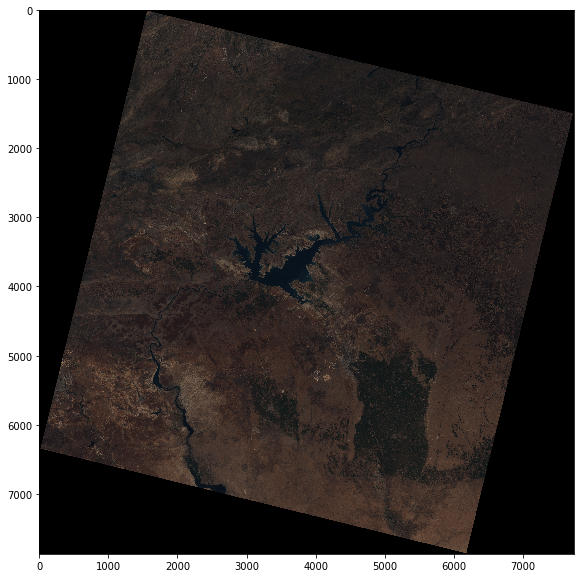

In [8]:
rgb=show_rgb(r'../urfa/LC08_L1TP_173034_20180711_20180717_01_T1/LC08_L1TP_173034_20180711_20180717_01_T_TOA/')

In [34]:
def get_rgb_path(input_path):
    rgb_path=[]
    search_criteria = "*.TIF"
    glob_criteria = os.path.join(input_path, search_criteria)
    img_list = glob.glob(glob_criteria)
    try:        
        for img in img_list:
            bandnum = _parse_bands_from_filename([img], '.*/*LC08.*\_B{b}.TIF')
            if bandnum[0] ==2 :
                rgb_path.insert(2,img)
            if bandnum[0] ==3 :
                rgb_path.insert(1,img)
            if bandnum[0] ==4 :
                rgb_path.insert(0,img)
        
    except ValueError:
        pass       
        

    return rgb_path

In [35]:
def get_rgbnir_path(input_path):
    rgbnir_path=[]
    search_criteria = "*.TIF"
    glob_criteria = os.path.join(input_path, search_criteria)
    img_list = glob.glob(glob_criteria)
    try:
        
        for img in img_list:
            bandnum = _parse_bands_from_filename([img], '.*/*LC08.*\_B{b}.TIF')
    
            if bandnum[0] ==2 :
                rgbnir_path.insert(2,img)
            if bandnum[0] ==3 :
                rgbnir_path.insert(1,img)
            if bandnum[0] ==4 :
                rgbnir_path.insert(0,img)
            if bandnum[0] ==5 :
                rgbnir_path.insert(3,img)
    except ValueError:
        pass

    return sorted(rgbnir_path,reverse=True)

In [36]:
rgb_path=get_rgb_path(dirpath)
rgb_path

['../mardin/LC08_L1TP_172034_20180704_20180717_01_T1/LC08_L1TP_172034_20180704_20180717_01_T_TOA/TOA_LC08_L1TP_172034_20180704_20180717_01_T1_B4.TIF',
 '../mardin/LC08_L1TP_172034_20180704_20180717_01_T1/LC08_L1TP_172034_20180704_20180717_01_T_TOA/TOA_LC08_L1TP_172034_20180704_20180717_01_T1_B3.TIF',
 '../mardin/LC08_L1TP_172034_20180704_20180717_01_T1/LC08_L1TP_172034_20180704_20180717_01_T_TOA/TOA_LC08_L1TP_172034_20180704_20180717_01_T1_B2.TIF']

In [37]:
rgbnir_path=get_rgbnir_path(dirpath)
rgbnir_path

['../mardin/LC08_L1TP_172034_20180704_20180717_01_T1/LC08_L1TP_172034_20180704_20180717_01_T_TOA/TOA_LC08_L1TP_172034_20180704_20180717_01_T1_B5.TIF',
 '../mardin/LC08_L1TP_172034_20180704_20180717_01_T1/LC08_L1TP_172034_20180704_20180717_01_T_TOA/TOA_LC08_L1TP_172034_20180704_20180717_01_T1_B4.TIF',
 '../mardin/LC08_L1TP_172034_20180704_20180717_01_T1/LC08_L1TP_172034_20180704_20180717_01_T_TOA/TOA_LC08_L1TP_172034_20180704_20180717_01_T1_B3.TIF',
 '../mardin/LC08_L1TP_172034_20180704_20180717_01_T1/LC08_L1TP_172034_20180704_20180717_01_T_TOA/TOA_LC08_L1TP_172034_20180704_20180717_01_T1_B2.TIF']

In [10]:
from osgeo import gdal


In [15]:
output_vrt=dirpath+'/rgb.vrt'
outds = gdal.BuildVRT(output_vrt, rgb_path, separate=True,VRTNodata=0,resolution='highest')


In [16]:
#get vrt epsg_4326
output_vrt_4326=dirpath+'/rgb_4326.vrt'
outds_4326 = gdal.BuildVRT(output_vrt_4326, rgb_path, separate=True,VRTNodata=0,resolution='highest',outputSRS='EPSG:4326')


In [17]:
print(gdal.Info(outds_4326))

Driver: VRT/Virtual Raster
Files: ../urfa/LC08_L1TP_173034_20180711_20180717_01_T1/LC08_L1TP_173034_20180711_20180717_01_T_TOA/rgb_4326.vrt
       ../urfa/LC08_L1TP_173034_20180711_20180717_01_T1/LC08_L1TP_173034_20180711_20180717_01_T_TOA/TOA_LC08_L1TP_173034_20180711_20180717_01_T1_B4.TIF
       ../urfa/LC08_L1TP_173034_20180711_20180717_01_T1/LC08_L1TP_173034_20180711_20180717_01_T_TOA/TOA_LC08_L1TP_173034_20180711_20180717_01_T1_B3.TIF
       ../urfa/LC08_L1TP_173034_20180711_20180717_01_T1/LC08_L1TP_173034_20180711_20180717_01_T_TOA/TOA_LC08_L1TP_173034_20180711_20180717_01_T1_B2.TIF
Size is 7741, 7871
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
Origin = (348285.000000000000000,4265

In [18]:
input_vrt=outds_4326
output_tif=dirpath+'rgb_4326.tif'

In [19]:
gdal.Translate(output_tif,outds_4326)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f76d00e2120> >

In [ ]:
gdal.Warp(translate_path ,image_path, format = 'GTiff', dstSRS = 'EPSG:4326',srcNodata = 0,dstNodata=0)